In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns


Leídos 99 vectores de dimensión 2
Iter 1: Desplazamiento = 445.869049
Iter 2: Desplazamiento = 19.210236
Iter 3: Desplazamiento = 4.825908
Iter 4: Desplazamiento = 3.765789
Iter 5: Desplazamiento = 2.178392
Iter 6: Desplazamiento = 0.000000
Resultados guardados en clustered_results.csv


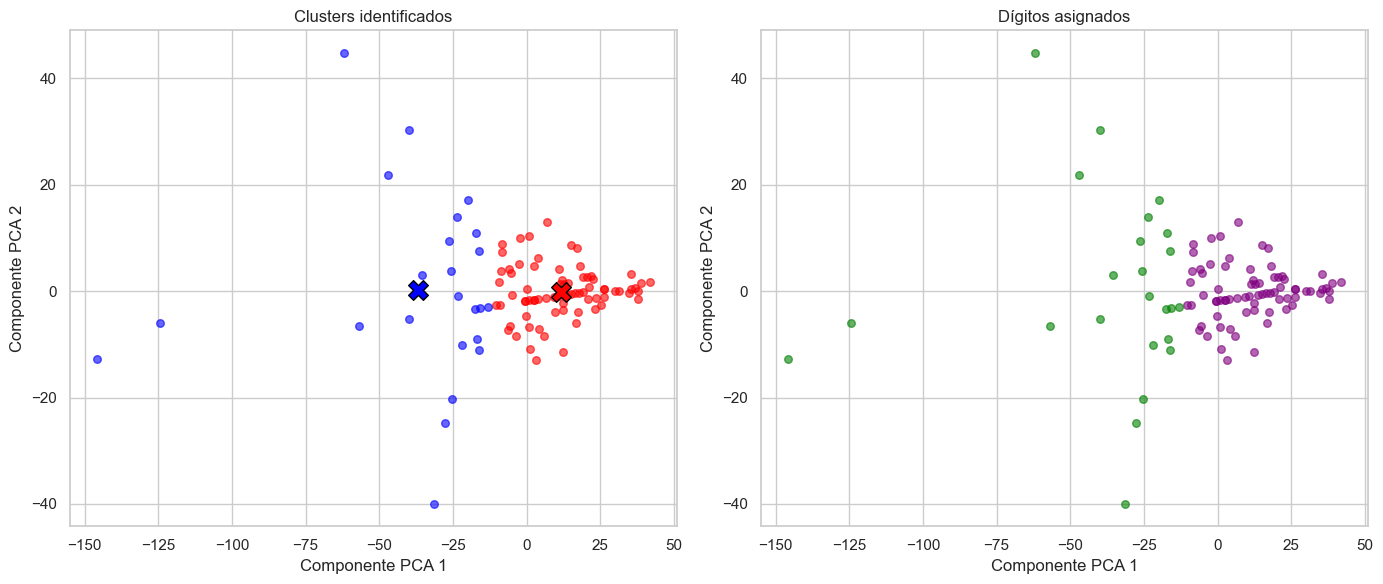

Proceso completado. Gráfica generada: clustering_results.png


In [7]:

# Parámetros configurables
N_c = 2  # 2 clusters
epsilon = 1e-4
input_file = "vectorizaciones.csv"
output_file = "clustered_results.csv"
max_iter = 100

# Leer datos desde CSV
data = pd.read_csv(input_file, header=None).values
N_data, D = data.shape
print(f"Leídos {N_data} vectores de dimensión {D}")

# Inicialización aleatoria de centroides [0, 1]
np.random.seed(42)
K = np.random.rand(N_c, D)

# Variables para clustering
cluster = np.zeros(N_data, dtype=int)
iter_count = 0
centroid_shift = float('inf')

# Algoritmo K-means manual
while centroid_shift > epsilon and iter_count < max_iter:
    # Paso 1: Asignación de clusters
    for i in range(N_data):
        min_dist = float('inf')
        best_cluster = 0
        for j in range(N_c):
            dist = np.sum((data[i] - K[j]) ** 2)  # Distancia euclidiana cuadrada
            if dist < min_dist:
                min_dist = dist
                best_cluster = j
        cluster[i] = best_cluster
    
    # Paso 2: Actualización de centroides
    new_K = np.zeros_like(K)
    counts = np.zeros(N_c)
    for i in range(N_data):
        c = cluster[i]
        new_K[c] += data[i]
        counts[c] += 1
    
    for j in range(N_c):
        if counts[j] > 0:
            new_K[j] /= counts[j]
    
    # Calcular desplazamiento de centroides
    centroid_shift = np.sqrt(np.sum((K - new_K) ** 2))
    K = new_K.copy()
    iter_count += 1
    print(f"Iter {iter_count}: Desplazamiento = {centroid_shift:.6f}")

# Calcular intensidad promedio por cluster
avg_intensity = np.zeros(N_c)
for i in range(N_data):
    c = cluster[i]
    avg_intensity[c] += np.sum(data[i])

avg_intensity /= (N_data * D)

# Mapear clusters a dígitos
cluster_to_digit = np.zeros(N_c, dtype=int)
if avg_intensity[0] > avg_intensity[1]:
    cluster_to_digit[0], cluster_to_digit[1] = 1, 0
else:
    cluster_to_digit[0], cluster_to_digit[1] = 0, 1

# Guardar resultados
results = []
for i in range(N_data):
    results.append([i, cluster[i], cluster_to_digit[cluster[i]]])

pd.DataFrame(results, columns=['indice', 'cluster', 'digito']).to_csv(output_file, index=False)
print(f"Resultados guardados en {output_file}")

# Visualización (PCA para reducción dimensional)
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Crear gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Clusters originales
colors = ['blue', 'red']
for i in range(N_data):
    ax1.scatter(data_2d[i, 0], data_2d[i, 1], 
                color=colors[cluster[i]], alpha=0.6, s=30)
    
for j in range(N_c):
    centroid_2d = pca.transform(K[j].reshape(1, -1))
    ax1.scatter(centroid_2d[0, 0], centroid_2d[0, 1], 
                color=colors[j], marker='X', s=200, edgecolor='black')
    
ax1.set_title('Clusters identificados')
ax1.set_xlabel('Componente PCA 1')
ax1.set_ylabel('Componente PCA 2')
ax1.grid(True)

# Gráfico 2: Dígitos asignados
digit_colors = ['green', 'purple']
for i in range(N_data):
    ax2.scatter(data_2d[i, 0], data_2d[i, 1], 
                color=digit_colors[cluster_to_digit[cluster[i]]], alpha=0.6, s=30)
    
ax2.set_title('Dígitos asignados')
ax2.set_xlabel('Componente PCA 1')
ax2.set_ylabel('Componente PCA 2')
ax2.grid(True)

plt.tight_layout()
plt.savefig('clustering_results.png', dpi=300)
plt.show()

print("Proceso completado. Gráfica generada: clustering_results.png")

In [9]:
# conteo de imagenes por cluster
image_counts = np.bincount(cluster, minlength=N_c)
print("Conteo de imágenes por cluster:")
for i in range(N_c):
    print(f"Cluster {i}: {image_counts[i]} imágenes")



Conteo de imágenes por cluster:
Cluster 0: 24 imágenes
Cluster 1: 75 imágenes
